In [660]:
import pandas as pd
import numpy as np

In [661]:
df = pd.read_csv('laptop_data.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [663]:
print('Duplicated sum values:', df.duplicated().sum(), '\n')
print('Missing sum values:')
print(df.isnull().sum())

Duplicated sum values: 0 

Missing sum values:
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [664]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [665]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [666]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [667]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [668]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [669]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

In [670]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price', ylabel='Density'>

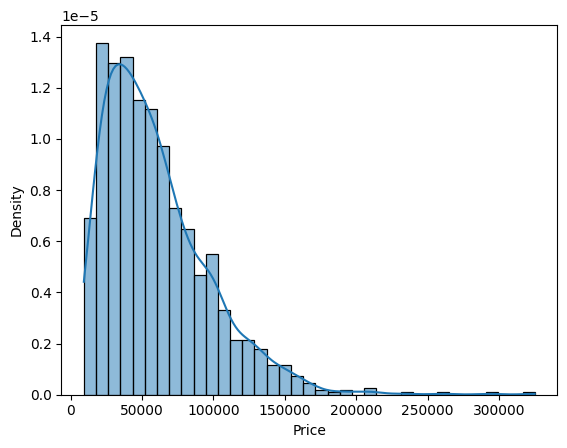

In [671]:
sns.histplot(df['Price'], kde=True, stat='density')

<Axes: xlabel='Company'>

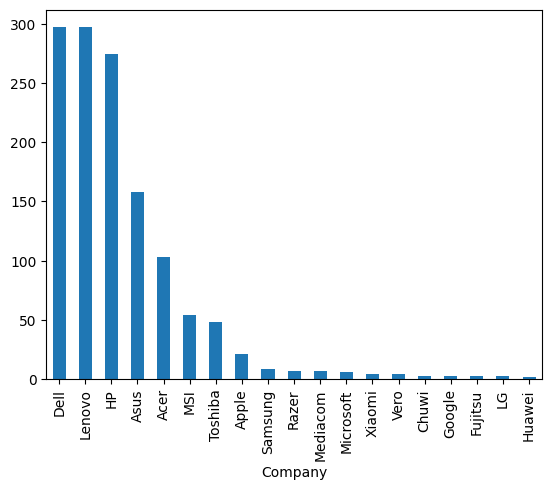

In [672]:
df['Company'].value_counts().plot(kind='bar')

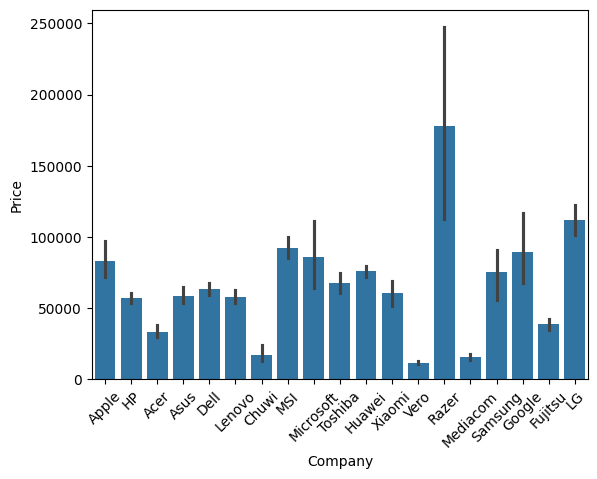

In [673]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='TypeName'>

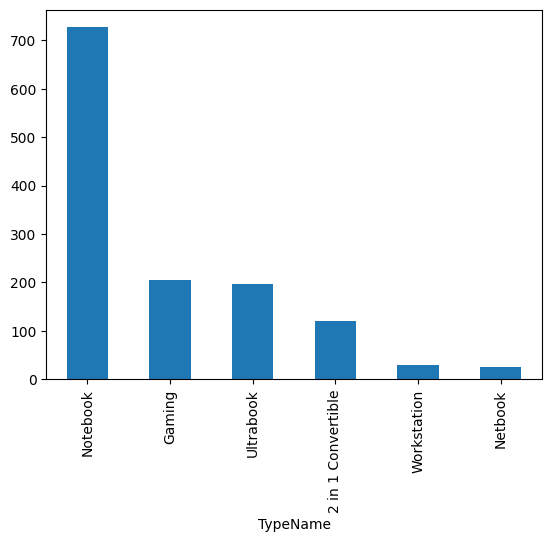

In [674]:

df['TypeName'].value_counts().plot(kind='bar')

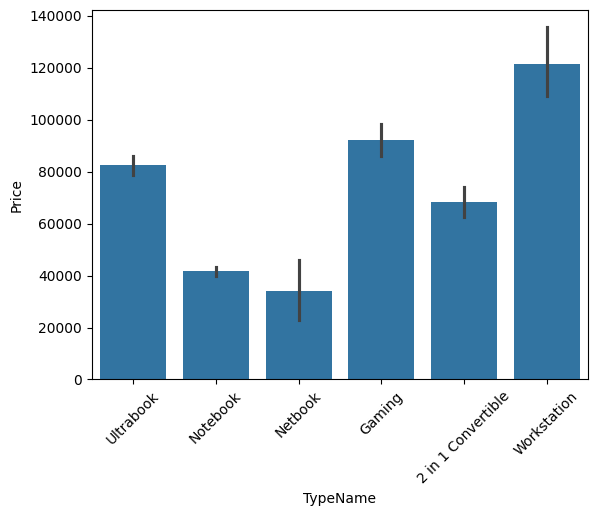

In [675]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

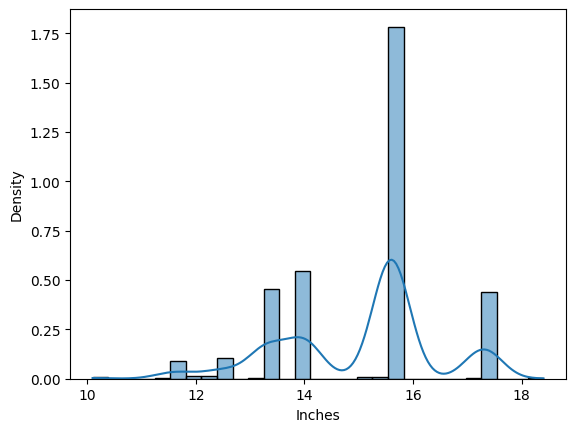

In [676]:
sns.histplot(df['Inches'], kde=True, stat='density')

<Axes: xlabel='Inches', ylabel='Price'>

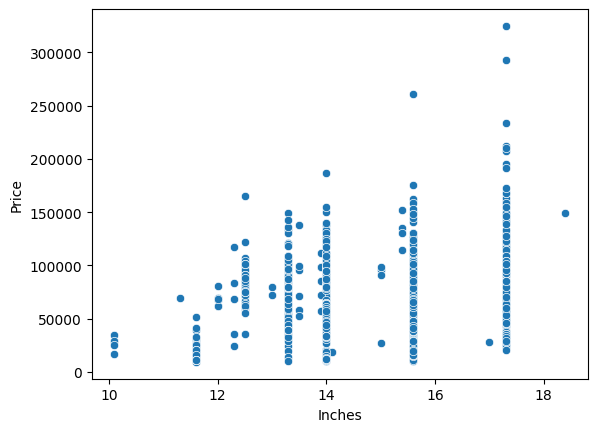

In [677]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [678]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [679]:
df['Touchscreen'] = df['ScreenResolution'].apply(
    lambda x: 1 if 'Touchscreen' in x else 0)

In [680]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
786,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,58021.9200,0
739,Acer,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.40,21887.4240,0
1158,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 10,2.50,42010.7472,0
594,Lenovo,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,2.80,28185.1200,0
924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,97236.0000,1


<Axes: xlabel='Touchscreen'>

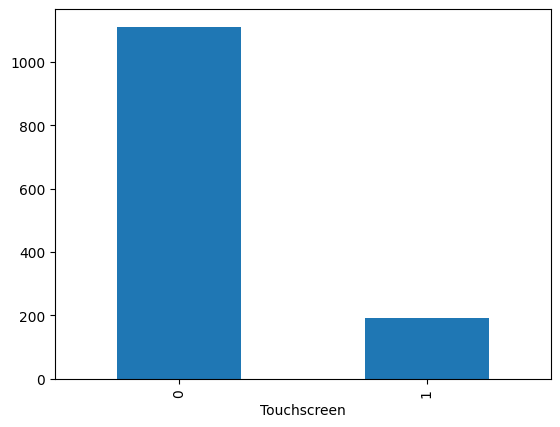

In [681]:
df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

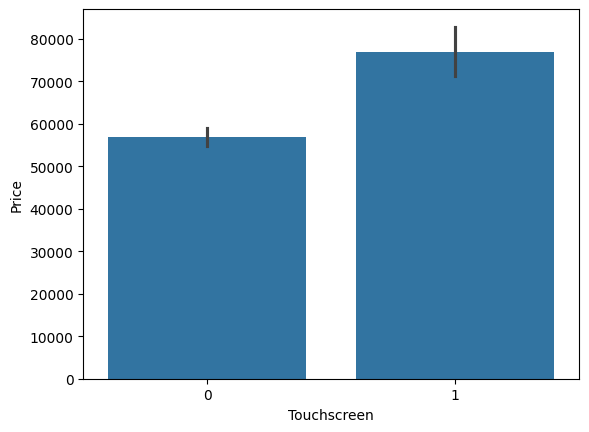

In [682]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])

In [683]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [684]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
442,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,76137.12,0,1
492,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928.00,0,0
286,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.95,58448.16,0,1


<Axes: xlabel='Ips', ylabel='Price'>

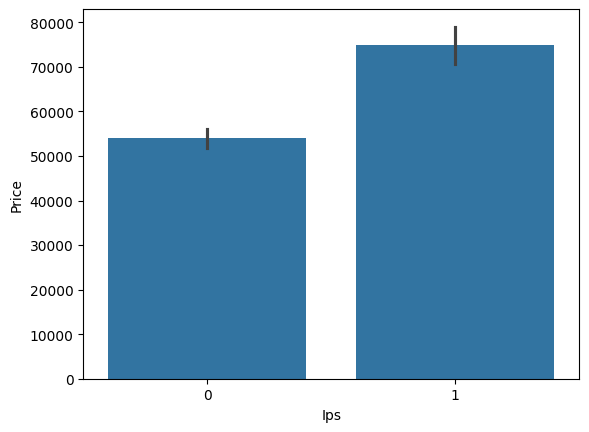

In [685]:
sns.barplot(x=df['Ips'], y=df['Price'])

In [686]:
SplitResolution = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [687]:
df['X_res'] = SplitResolution[0]
df['Y_res'] = SplitResolution[1]

In [688]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1073,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,58075.20,0,0,Full HD 1920,1080
492,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928.00,0,0,Full HD 1920,1080
899,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,500GB HDD,Intel HD Graphics 620,Windows 10,1.90,49816.80,0,0,Full HD 1920,1080
1026,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.31,63349.92,0,0,1366,768


In [689]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [690]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080


In [691]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
Touchscreen           int64
Ips                   int64
X_res                object
Y_res                object
dtype: object

In [692]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [693]:
df['Price'].dtypes

dtype('float64')

In [694]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [695]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))** 0.5/df['Inches']).astype(float)

In [696]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [697]:
df.drop(columns=['ScreenResolution'], inplace=True)

In [698]:
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [699]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [700]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [701]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [702]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
427,Dell,Ultrabook,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,58554.7200,0,0,157.350512,Intel Core i7
311,Dell,Ultrabook,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.21,133146.7200,1,1,331.264236,Intel Core i7
1074,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,91294.7472,1,1,176.232574,Intel Core i7


In [703]:
def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [704]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [705]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
90,Asus,Gaming,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,37242.720,0,0,141.211998,AMD FX 9830P,AMD Processor
791,Vero,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.22,10810.512,0,0,157.350512,Intel Celeron Dual,Other Intel Processor
548,HP,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,21152.160,0,0,141.211998,Intel Core i3,Intel Core i3


<Axes: xlabel='Cpu Brand'>

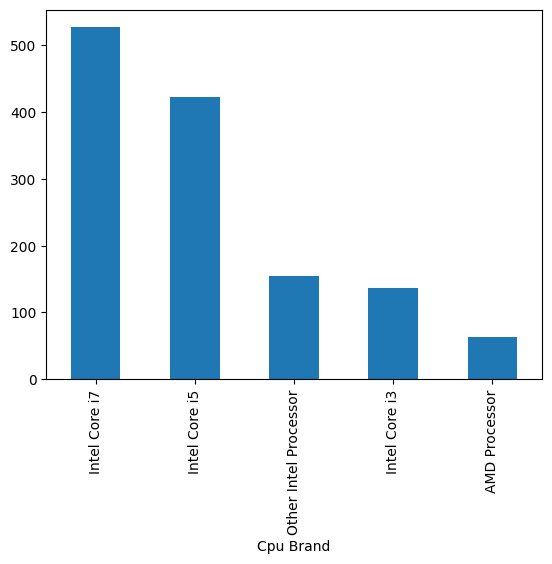

In [706]:
df['Cpu Brand'].value_counts().plot(kind='bar')

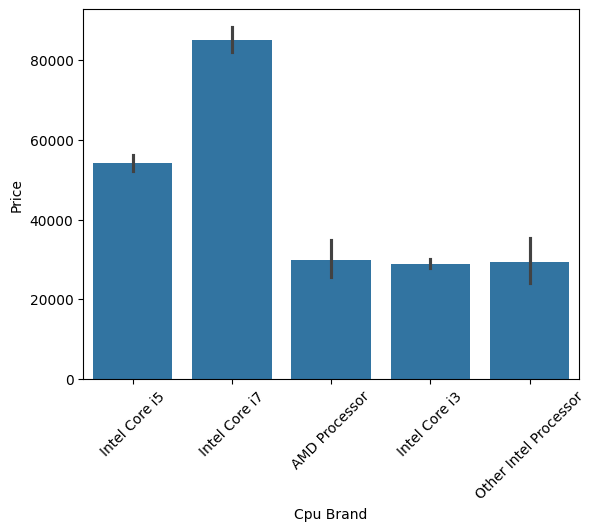

In [707]:
sns.barplot(x=df['Cpu Brand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [708]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [709]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

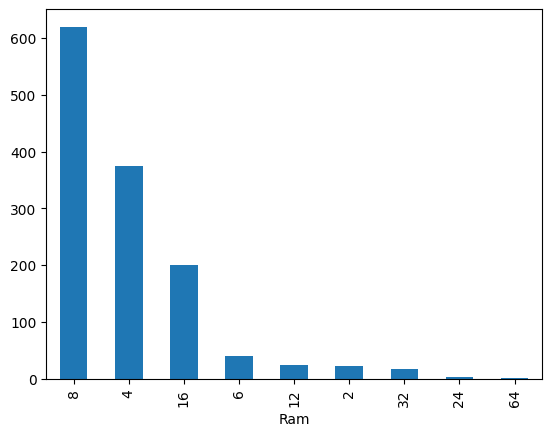

In [710]:
df['Ram'].value_counts().plot(kind='bar')

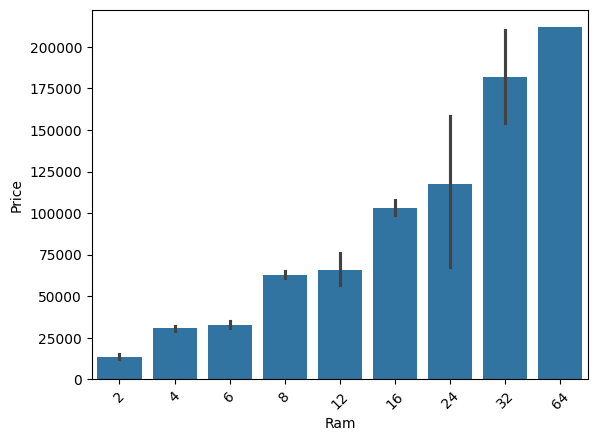

In [711]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [712]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [713]:
df.columns = df.columns.str.strip()

if 'Memory' in df.columns:
    df['Memory'] = df['Memory'].astype(str).str.replace(r'\.0$', '', regex=True)
    df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
    df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)
    new = df["Memory"].str.split("+", n=1, expand=True)
    df["first"] = new[0].str.strip()
    df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
    df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
    df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
    df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
    df['first'] = df['first'].str.extract(r'(\d+)', expand=False).astype(float)
    df["second"] = new[1].fillna("0").str.strip()
    df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
    df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
    df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
    df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
    df['second'] = df['second'].str.extract(r'(\d+)', expand=False).astype(float)
    df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]).astype(int)
    df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]).astype(int)
    df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]).astype(int)
    df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]).astype(int)

    df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage','Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)
else:
    print("The 'Memory' column does not exist in the DataFrame.")


In [714]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
595,Lenovo,Notebook,8,1000 HDD,Intel HD Graphics 520,Windows 10,2.29,24455.52,0,0,100.454670,Intel Core i3,1000,0,0,0
1142,HP,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 520,Windows 10,1.48,86793.12,1,0,165.632118,Intel Core i5,0,256,0,0
1230,Lenovo,Netbook,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,87912.00,1,1,176.232574,Intel Core i7,0,512,0,0
810,HP,Gaming,12,1000 HDD,AMD Radeon RX 580,Windows 10,3.74,93186.72,0,1,127.335675,Intel Core i7,1000,0,0,0
609,Acer,Notebook,4,128 Flash Storage,Intel HD Graphics 405,Windows 10,1.60,18594.72,0,0,111.935204,Other Intel Processor,0,0,0,128


In [715]:
df.drop(columns=['Memory'], inplace=True)

In [716]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [717]:
df.corr(numeric_only=True)['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.095476
SSD              0.670799
Hybrid          -0.004769
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [718]:
df.drop(columns=['Hybrid', 'Flash_Storage'], inplace=True)

In [719]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD
1123,Dell,Notebook,4,Intel HD Graphics 520,Linux,2.09,27899.0064,0,0,100.454670,Intel Core i5,500,0
349,Dell,Ultrabook,8,AMD Radeon 530,Windows 10,1.90,35324.6400,0,0,141.211998,Intel Core i5,1000,0
231,HP,Notebook,4,AMD Radeon R2,Windows 10,2.10,17582.4000,0,0,100.454670,AMD Processor,500,0


In [720]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [721]:
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [722]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
626,Mediacom,Notebook,2,Intel HD Graphics,Windows 10,1.4,12733.92,0,0,157.350512,Other Intel Processor,0,0,Intel
336,Dell,Ultrabook,8,Nvidia GeForce 940MX,Windows 10,1.9,55890.72,0,1,141.211998,Intel Core i5,1000,128,Nvidia
691,Lenovo,Notebook,4,Intel HD Graphics 620,Windows 10,1.7,37242.72,0,0,157.350512,Intel Core i5,0,256,Intel
439,Asus,Notebook,4,Intel HD Graphics 620,Linux,2.0,29783.52,0,0,141.211998,Intel Core i5,0,256,Intel
49,Asus,Notebook,4,Nvidia GeForce 920MX,Windows 10,2.8,24828.48,0,0,90.583402,Other Intel Processor,1000,0,Nvidia


In [723]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [724]:
df = df[df['GpuBrand'] != 'ARM']

In [725]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

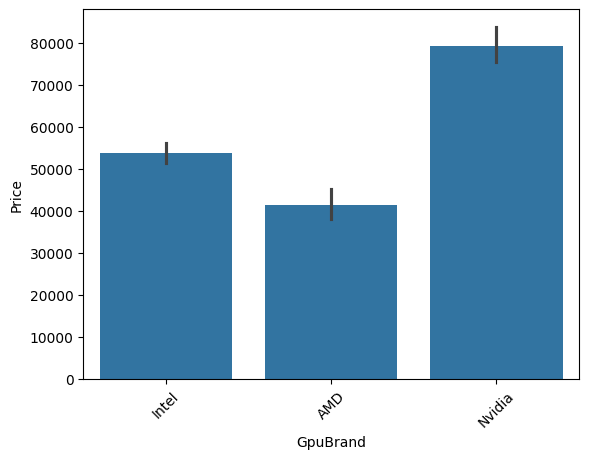

In [726]:
sns.barplot(x=df['GpuBrand'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [727]:
df = df.copy()
df.drop(columns=['Gpu'], inplace=True)

In [728]:
df.sample(4)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand
995,Asus,Notebook,8,Windows 10,1.40,61272.00,0,0,276.053530,Intel Core i5,0,256,Intel
897,HP,Notebook,8,Windows 10,2.04,47952.00,0,0,141.211998,Intel Core i7,1000,0,Nvidia
377,Dell,Notebook,4,Windows 10,1.80,16463.52,0,0,100.454670,Other Intel Processor,500,0,Intel
362,Lenovo,Notebook,6,Windows 10,2.80,38308.32,0,0,106.113062,Intel Core i5,1000,128,Nvidia


In [729]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

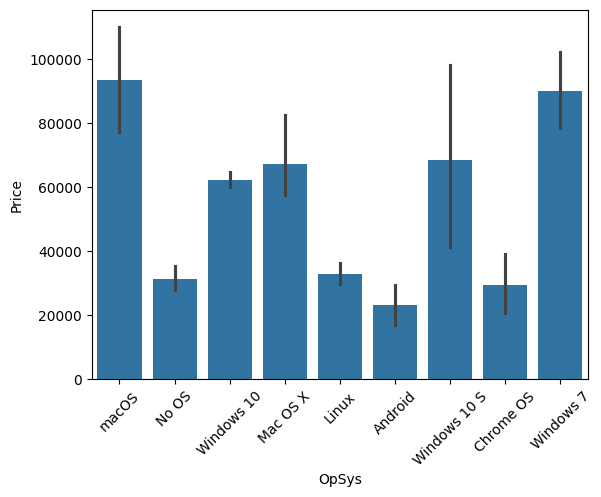

In [730]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

In [731]:
def categorizeOS(op):
    if op == 'Windows 10' or op == 'Windows 7' or op == 'Windows 10 S':
        return 'Windows'
    elif op == 'macOS' or op == 'Mac OS X':
        return 'Mac'
    else:
        return 'Linux/ChromeOS/Others'

In [732]:
df['os'] = df['OpSys'].apply(categorizeOS)

In [733]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
1267,Dell,Notebook,8,Linux,2.30,42943.1472,0,0,100.454670,Intel Core i7,1000,0,AMD,Linux/ChromeOS/Others
158,Dell,2 in 1 Convertible,8,Windows 10,1.56,55890.7200,1,0,141.211998,Intel Core i7,0,256,Intel,Windows
159,Toshiba,Notebook,4,Windows 10,2.10,23816.1600,0,0,100.454670,Intel Core i3,500,0,Intel,Windows
1114,Lenovo,2 in 1 Convertible,4,Android,0.69,29250.7200,1,1,224.173809,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1188,Dell,Ultrabook,8,Linux,1.23,58554.7200,1,0,276.053530,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others


In [734]:
df.drop(columns=['OpSys'], inplace=True)

In [735]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


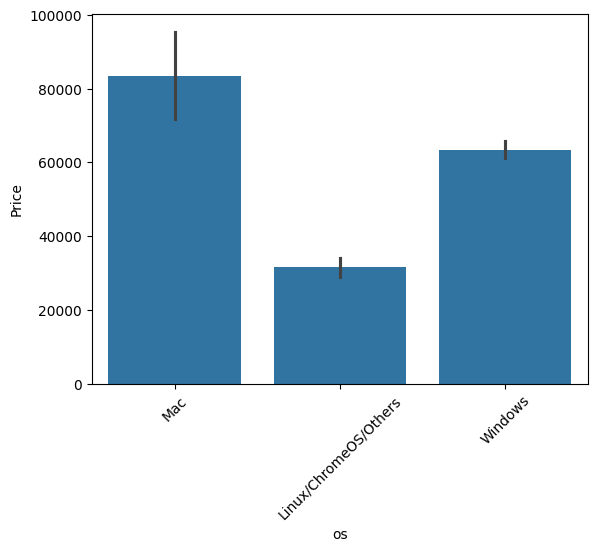

In [736]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

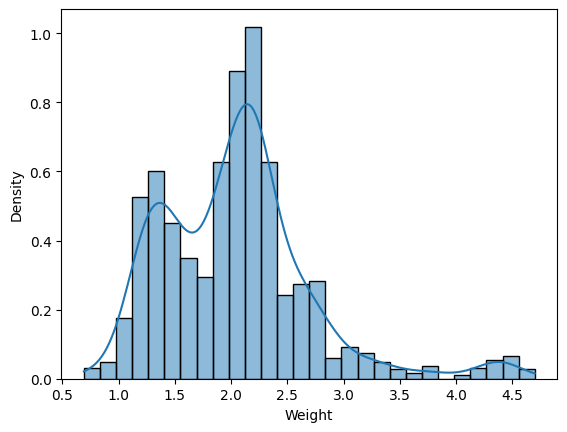

In [737]:
sns.histplot(df['Weight'], kde=True, stat='density')

<Axes: xlabel='Weight', ylabel='Price'>

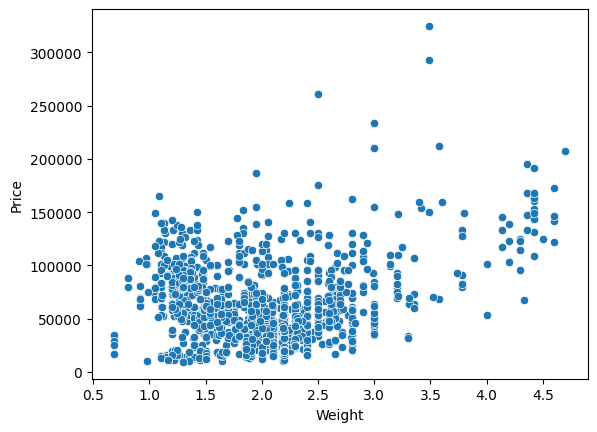

In [738]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

In [739]:
df.corr(numeric_only=True)

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095944,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.512126,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.095925,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208201,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.092685,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.293374,0.509437
HDD,0.095944,0.512126,-0.095925,-0.208201,-0.092685,-0.293374,1.000000,-0.399386
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.399386,1.000000


<Axes: >

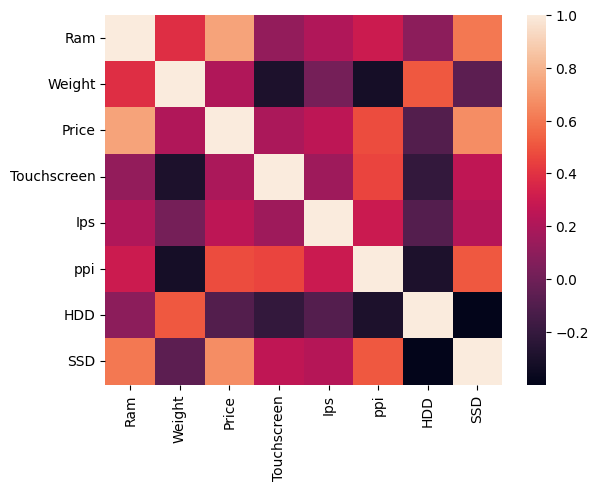

In [740]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: xlabel='Price', ylabel='Density'>

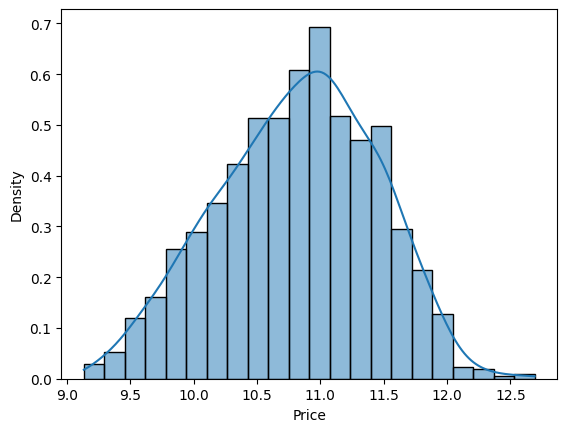

In [741]:
sns.histplot(np.log(df['Price']), kde=True, stat='density')

In [742]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [743]:
x.sample(5)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
88,Asus,Gaming,16,2.20,0,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1181,Lenovo,Ultrabook,6,1.54,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
314,Asus,2 in 1 Convertible,2,1.10,1,0,135.094211,Other Intel Processor,0,0,Intel,Windows
192,Xiaomi,Ultrabook,8,1.30,0,1,165.632118,Intel Core i5,0,256,Nvidia,Linux/ChromeOS/Others
582,HP,Notebook,4,1.49,0,0,165.632118,Intel Core i3,0,128,Intel,Windows


In [744]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [745]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=2)

In [746]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Linux/ChromeOS/Others


In [747]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV


In [748]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [749]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [750]:
# Define the transformers for specific columns
transformers = [('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])]

In [751]:

step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.807299394314139
Mean Absolute Error: 0.21019955789651168


In [752]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = Ridge(alpha=10)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8126285838441663
Mean Absolute Error: 0.2096161529036711


In [753]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = Lasso(alpha=0.001)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8070509921667253
Mean Absolute Error: 0.2113916853194616


In [754]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.7940177686762775
Mean Absolute Error: 0.199998217884851


In [755]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = DecisionTreeRegressor(max_depth=8)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8489123042941182
Mean Absolute Error: 0.1795888899721665


In [756]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8083622224965213
Mean Absolute Error: 0.20211592922666352


In [757]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8848768201402357
Mean Absolute Error: 0.1612032277253388


In [758]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8852978670532982
Mean Absolute Error: 0.16168737261883015


In [759]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.780110382676829
Mean Absolute Error: 0.23682813305445924


In [760]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.88621540676343
Mean Absolute Error: 0.15750618941093153


In [761]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8703004263953347
Mean Absolute Error: 0.16566417492693264


In [762]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
rf = RandomForestRegressor(n_estimators=350, random_state=3,max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3,max_samples=0.5, max_features=0.75, max_depth=10, bootstrap=True)
step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5, 1, 1, 1])
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8885168585669541
Mean Absolute Error: 0.15980849907520803


In [763]:
step1 = ColumnTransformer(transformers=transformers, remainder='passthrough')
rf = RandomForestRegressor(n_estimators=350, random_state=3,max_samples=0.5, max_features=0.75, max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
step2 = StackingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb)], final_estimator=Ridge(alpha=100))
pipe = Pipeline([('step1', step1),('step2', step2),])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2 Score:', r2)
print('Mean Absolute Error:', mae)

R2 Score: 0.8822430411267673
Mean Absolute Error: 0.16337321744082062


In [764]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Linux/ChromeOS/Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [765]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,GpuBrand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Linux/ChromeOS/Others
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Linux/ChromeOS/Others


In [766]:
import pickle
pickle.dump(df,open('laptop_data.pkl','wb'))
pickle.dump(pipe,open('pipe_object.pkl','wb'))

In [770]:
transformers = [('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])]
step1 = ColumnTransformer(transformers=transformers)
step2 = RandomForestRegressor()
pipe = Pipeline([('step1', step1),('step2', step2),])
param_grid = {'step2__n_estimators': [100, 200, 300],'step2__max_depth': [10, 15, 20],'step2__max_features': [0.6, 0.7, 0.8],}
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Best Parameters:', best_params)
print('R2 Score:', round(r2, 2), '(', round(r2 * 100, 2), '%)')
print('Mean Absolute Error:', round(mae, 2), '(', round(mae * 100, 2), '%)')

Best Parameters: {'step2__max_depth': 10, 'step2__max_features': 0.7, 'step2__n_estimators': 300}
R2 Score: 0.77 ( 77.37 %)
Mean Absolute Error: 0.23 ( 23.46 %)


In [771]:
from sklearn.model_selection import RandomizedSearchCV
transformers = [('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11]),]
step1 = ColumnTransformer(transformers=transformers)
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
voting = VotingRegressor(estimators=[('rf', rf), ('gb', gb)],weights=[1, 1])
pipe = Pipeline([('step1', step1),('scaler', StandardScaler()),('voting', voting)])
param_dist = {'voting__rf__n_estimators': [100, 200, 300],'voting__rf__max_depth': [10, 15, 20],'voting__rf__max_features': [0.6, 0.7, 0.8],'voting__gb__n_estimators': [100, 200, 300],'voting__gb__max_depth': [3, 4, 5],}
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=-1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
y_pred = best_estimator.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Best Parameters:', best_params)
print('R2 Score:', round(r2, 2), '(', round(r2 * 100, 2), '%)')
print('Mean Absolute Error:', round(mae, 2), '(', round(mae * 100, 2), '%)')


Best Parameters: {'voting__rf__n_estimators': 100, 'voting__rf__max_features': 0.8, 'voting__rf__max_depth': 10, 'voting__gb__n_estimators': 300, 'voting__gb__max_depth': 3}
R2 Score: 0.78 ( 78.02 %)
Mean Absolute Error: 0.23 ( 22.95 %)


In [772]:
import pickle
pickle.dump(df,open('laptop_data.pkl','wb'))
with open('pipe_object.pkl', 'wb') as model_file:
    pickle.dump(best_estimator, model_file)